# Interference Pattern

In [35]:
# Import libraries for mathematical operations
import numpy as np
from numpy import random as rd

# Import libraries to graph and animate
import matplotlib.pyplot as plt
import matplotlib.text   as tx
import seaborn as sns
import matplotlib.animation as animation

In [36]:
# Plot and graph format
plt.rcParams.update({'mathtext.default':  'regular' })
sns.set(context='paper',style="whitegrid",font='Times New Roman',font_scale=1.2)

# Magic command for notebook context of graphs
%matplotlib notebook

Traceback (most recent call last):
  File "/home/dhdzmota/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/dhdzmota/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "/home/dhdzmota/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/dhdzmota/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [37]:
# Boundaries and program parameters
# Boundaries:
a = 10
b = -10

# Number of Steps
Num = 100000

# X position (1 dimension)
x=np.linspace(b,a,Num)

# Physical Constants
h = 1.05457e-34 # Planks constant
m = 9.1093e-31 #  Mass of the electron 

In [38]:
# Wave function
def wave_function(t,x0,sigma,k0):
    # Wave Function equation
    wf= (2*np.pi*sigma**2)**(-1/4)*sigma/(
        np.sqrt(sigma**2+1j*h*t/(2*m*sigma)))*np.exp(-(
        x-x0-2j*sigma**2*k0)**2/(4*(np.sqrt(
        sigma**2+1j*h*t/(2*m*sigma)))**2)-
        sigma**2*k0**2+1j*k0*x)
    return wf

<IPython.core.display.Javascript object>


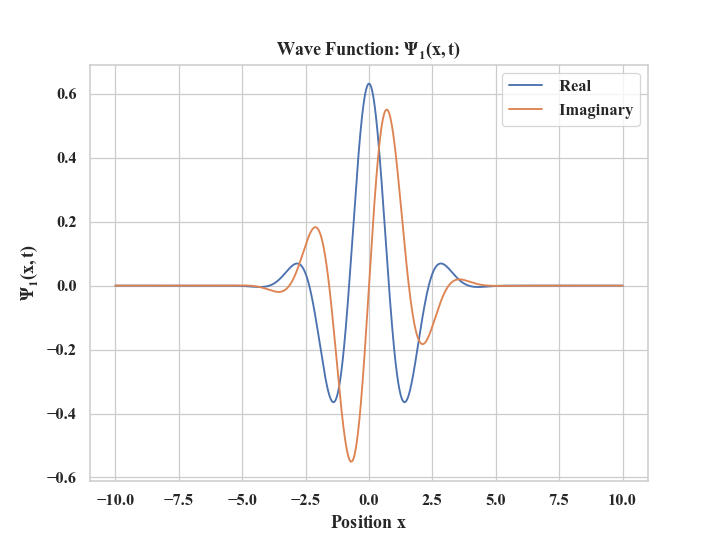

In [39]:
#First particle:
#Parameters
# Initial time
t = 0
# Initial position
x0 = 0
# Other parameters
sigma = 1
k0 = 1

#Evaluation of the function
Y1=wave_function(t,x0,sigma,k0) # This is a complex function

# Real and Imaginary components of the  wavefunction
reY1=np.real(Y1)
imY1=np.imag(Y1)

#Graph parameters:
plt.figure()
plt.title("Wave Function: $\Psi_1(x,t)$")
plt.plot(x,reY1,label=" Real")
plt.plot(x,imY1,label=" Imaginary")
plt.xlabel("Position $x$")
plt.ylabel("$\Psi_1(x,t)$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


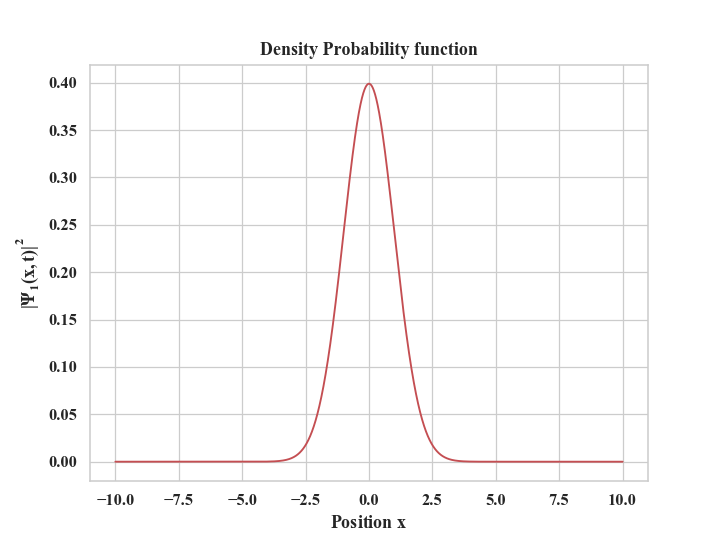

In [40]:
# Probability graph of the first wavefunction
YP1=(np.real(Y1)**2+np.imag(Y1)**2)

# Area underneath the curve
#A=(YP1)*((a-b)/len(x))

# Graph:
plt.figure()
plt.title("Density Probability function")
plt.plot(x,YP1, c='r')
plt.xlabel("Position $x$")
plt.ylabel("$|\Psi_1(x,t)|^2$")

plt.show()

<IPython.core.display.Javascript object>


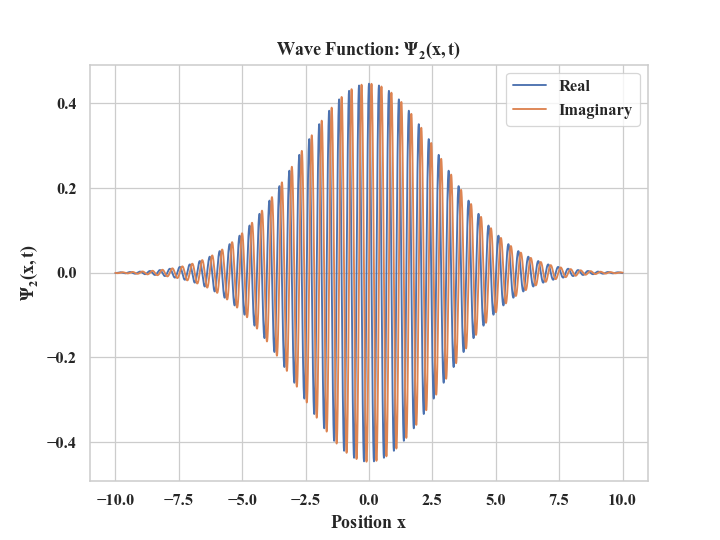

In [41]:
#Second function
# Initial parameters
t = 0
x0 = 0
sigma = 2.0
k0 = 8

#Evaluation of the wave Function:
Y2=wave_function(t,x0,sigma,k0)

#Real and Imaginary components
imY2=np.imag(Y2)
reY2=np.real(Y2)

#Graph parameters:
plt.figure()
plt.title("Wave Function: $\Psi_2(x,t)$")
plt.plot(x,reY2,label="Real")
plt.plot(x,imY2,label="Imaginary")
plt.xlabel("Position $x$")
plt.ylabel("$\Psi_2(x,t)$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


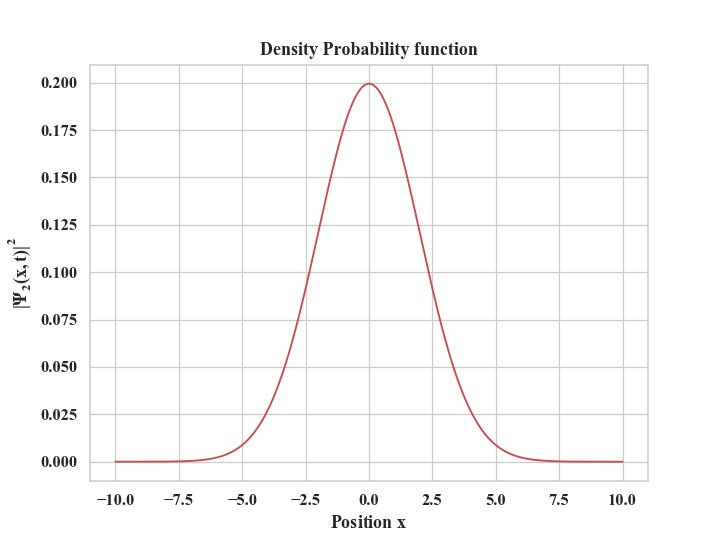

In [42]:
# Probability graph of the second wavefunction
YP2=(np.real(Y2)**2+np.imag(Y2)**2)

# Graph parameters:
plt.figure()
plt.title("Density Probability function")
plt.plot(x,YP2, c='r')
plt.xlabel("Position $x$")
plt.ylabel("$|\Psi_2(x,t)|^2$")
plt.show()


<IPython.core.display.Javascript object>


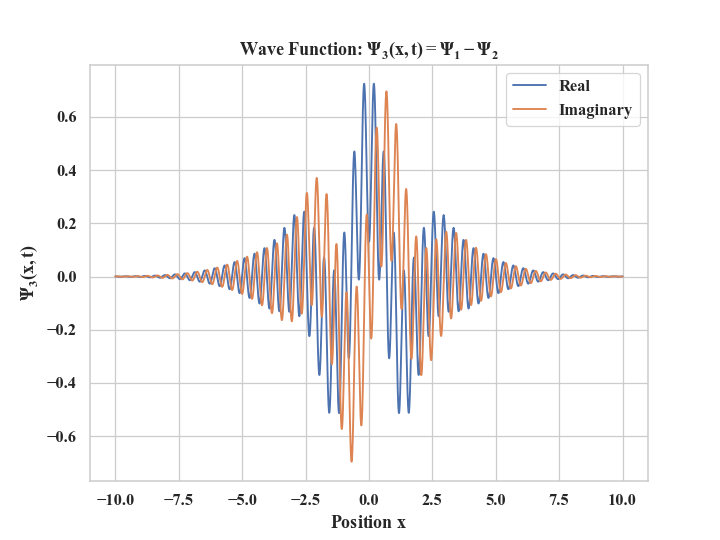

In [43]:
# Linear combination of both functions

#Linear combination must normalize itself:
Y3=1/np.sqrt(2)*(Y1-Y2)

#Real and Imaginary components
reY3=np.real(Y3)
imY3=np.imag(Y3)

#Graph:
plt.figure()
plt.title("Wave Function: $\Psi_3(x,t)=\Psi_1-\Psi_2$")
plt.plot(x,reY3,label="Real")
plt.plot(x,imY3,label="Imaginary")
plt.xlabel("Position $x$")
plt.ylabel("$\Psi_3(x,t)$")
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


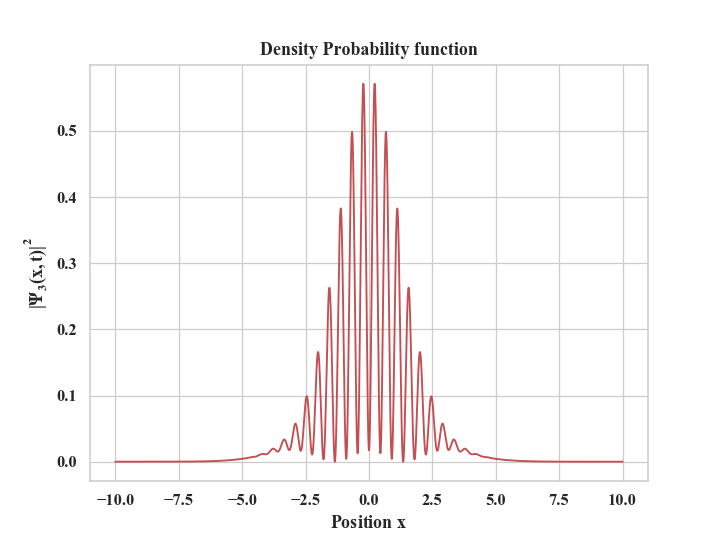

In [44]:
# Probability graph of the third wavefunction

YP=(np.real(Y3)**2+np.imag(Y3)**2)

# Area underneath the curve
A=(YP)*((a-b)/len(x))

# Graph:
plt.figure()
plt.title("Density Probability function")
plt.plot(x,YP, c='r')#,label="$|\Psi_3(x,t)|^2$")
plt.xlabel("Position $x$")
plt.ylabel("$|\Psi_3(x,t)|^2$")

plt.show()

# Sum must be equal to one
c=1-np.sum(A) #Account for small error
A[int(Num/2)]=A[(int(Num/2))]+c #Add the small error arbitrarily the vector 
                                #(this time in the middle) 

<IPython.core.display.Javascript object>


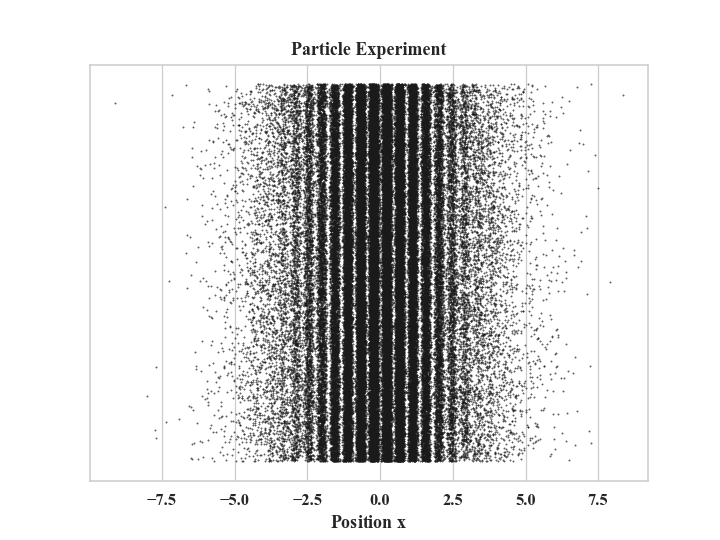

In [50]:
# Double slit experiment:

# Have random values of x with the probability assigned
# by the wave function's Density Probability function selected
random_particles = rd.choice(x,Num,p=A)

# Normalize the selection of random numbers to the maximun heigh of the Density Probability function
# This will have the particles randomly be on the y axis. 
y=max(YP)*np.random.rand(Num)

# Plot:
plt.figure()
plt.title("Particle Experiment")
plt.xlabel("Position $x$")
plt.yticks([])
plt.scatter(random_particles ,y, s=.1, c='k')
plt.show()

<IPython.core.display.Javascript object>


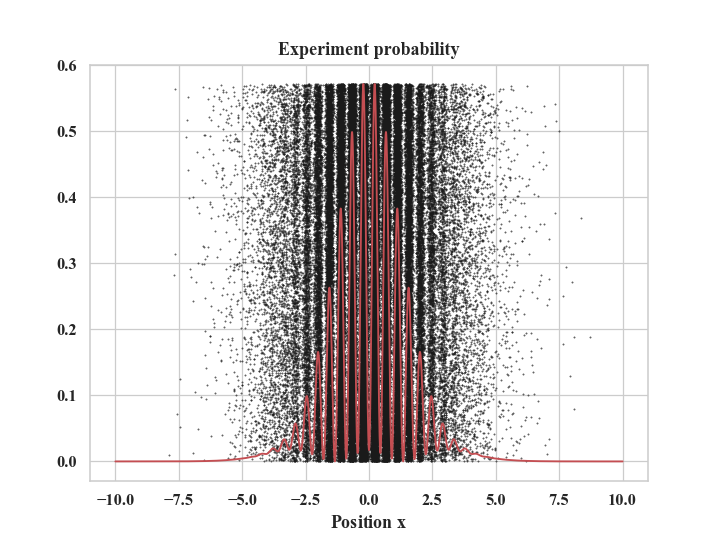

In [46]:
# Plot of the density probability function and the experiment together
plt.figure()
plt.title("Experiment probability")
plt.scatter(d,y, s=.1, c='k')
plt.plot(x,YP,label="Probability",color="r")
plt.xlabel("Position $x$")
plt.show()

<IPython.core.display.Javascript object>


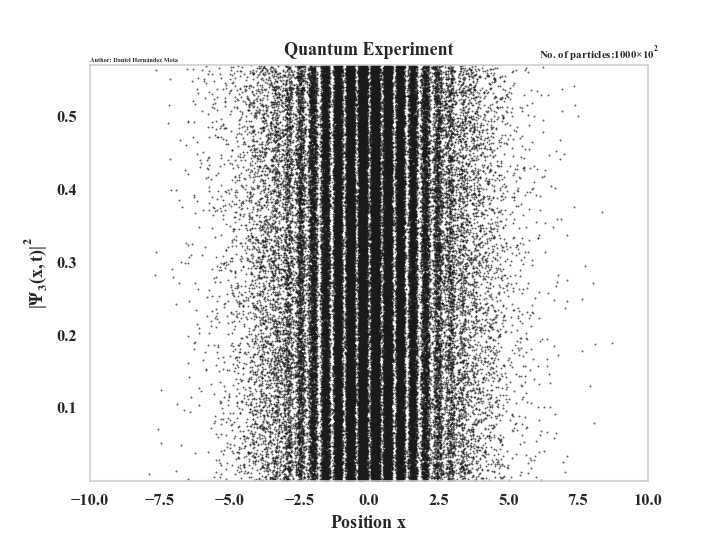

In [47]:
# Create the animation
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot for the probability density function
plots, = ax.plot([],[])

# Plot for the experiment
scatt = ax.scatter([],[])

# Text in the plot that will dynamically change (count the number of particles)
text = plt.text(6.1,.58,f'No. of particles: 0', fontsize=7)

# Name
text2 = plt.text(-10.0,.575,f'Author: Daniel Hernández Mota', fontsize=4)

# Graph initial parameters
ax.set_title('Quantum Experiment')
ax.set_xlim([b,a])
ax.set_ylim([min(YP),max(YP)])
plt.xlabel("Position $x$")
plt.ylabel("$|\Psi_3(x,t)|^2$")
plt.grid()

# Decide a number of the division of the total number of x values. 
long=400

# Color pallete
color = sns.color_palette("Reds", int(Num/(long)))

def animate2(i):
    # Condition to be satisfied so that the loop is over
    if (i+1)*long<=Num:
        # Scatter plot ("long" points each iteration)
        ax.scatter(d[i*long:(i+1)*long-1], y[i*long:(i+1)*long-1], s=.1,c='k')
        # Modification of the text 
        text.set_text(f'No. of particles:{int((i+1)*long/100)}$\\times 10^2$')
        # Add data for the distribution function
        plots.set_data(x,YP)
        # Change the color with the color palete
        plots.set_color(color[i])
        # Obtain a parameter to modify alpha(transparency)
        b=Num/long
        # Use a negative cuadratic expression with a domain of [0, Num/long](indicating the frames) 
        # and a range of [0,1]. 
        plots.set_alpha(alpha=-4*(i/b)**2+4/b*i)

ani2 = animation.FuncAnimation(fig, animate2, interval=100, frames=int(Num/long), repeat=False)

#ani2.save('interference_pattern.gif', writer='imagemagick')
#ani2.save('interference_pattern.mp4', writer='ffmpeg')
